In [8]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matyplotlib -rf

Sudo媛� �씠 而댄벂�꽣�뿉�꽌 �궗�슜�븯吏� �븡�룄濡� �꽕�젙�릺�뼱 �엳�뒿�땲�떎. �궗�슜�븯�룄濡� �꽕�젙�븯�젮硫� �쑝濡� �씠�룞�븯�꽭�슂. ]8;;ms-settings:developers\Developer Settings page]8;;\ �꽕�젙 �빋�쓽
Sudo媛� �씠 而댄벂�꽣�뿉�꽌 �궗�슜�븯吏� �븡�룄濡� �꽕�젙�릺�뼱 �엳�뒿�땲�떎. �궗�슜�븯�룄濡� �꽕�젙�븯�젮硫� �쑝濡� �씠�룞�븯�꽭�슂. ]8;;ms-settings:developers\Developer Settings page]8;;\ �꽕�젙 �빋�쓽
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [12]:
plt.rc('font', family='NanumBarunGothic')

전체 25년 MAE=0.2853, MAPE=33661162590003308.00%


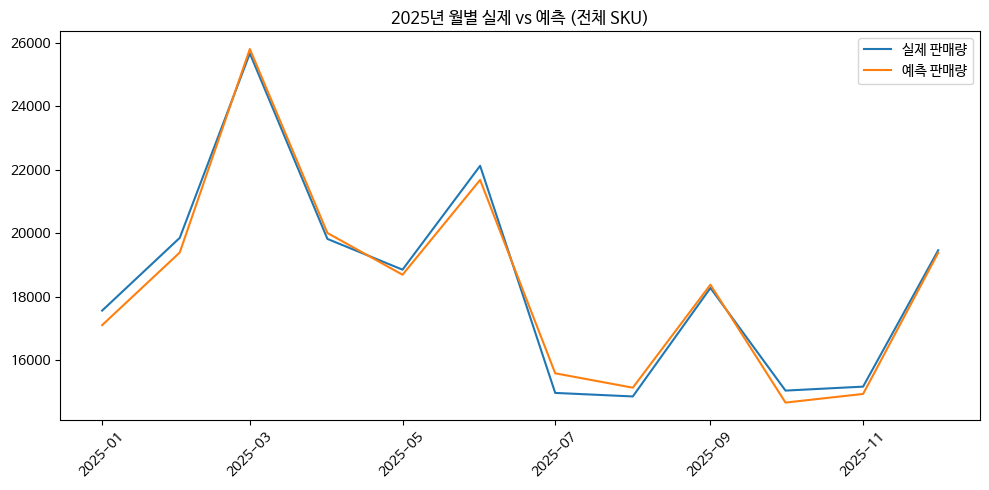

MAE 큰 SKU TOP 10
                product_code  actual         pred       mae
3242  PHN-APP-128GB-레드-04982    1291  1151.830811  6.589946
3277   PHN-APP-64GB-블랙-05072     849   799.272705  4.884229
3419  PHN-SAM-128GB-블루-04989     966   891.888297  4.571634
3424  PHN-SAM-256GB-블랙-05050     845   837.597147  4.461292
3266  PHN-APP-512GB-블랙-04999     769   742.620793  3.949819
3417  PHN-SAM-128GB-블랙-05062     726   690.072240  3.760825
3256  PHN-APP-256GB-블루-04956     766   722.621181  3.746784
3276   PHN-APP-64GB-블랙-05061     826   805.094153  3.689974
3264  PHN-APP-512GB-레드-04973     818   790.948882  3.674951
3253  PHN-APP-256GB-블랙-04979     752   747.166240  3.670323


KeyError: 'cat_mid'

In [10]:
# notebooks/model_eval_2025.ipynb 안에서 쓸 코드 예시

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = Path("../app/data_pipeline")

# 1) 25년 테스트 결과 로드
df = pd.read_csv(DATA_DIR / "eval_2025_pred_vs_actual.csv")
df["target_date"] = pd.to_datetime(df["target_date"])

# (옵션) SKU → 카테고리 매핑
sku_cat = pd.read_csv(DATA_DIR / "sku_catalog_ml.csv")  # 파일 이름은 네 구조에 맞게
df = df.merge(sku_cat[["product_code", "cat_low"]],
              on="product_code", how="left")

df["category_name"] = df["cat_low"].fillna("UNKNOWN")

# 2) 전체 25년 성능
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

mae  = mean_absolute_error(df["y"], df["y_pred"])
mape = mean_absolute_percentage_error(df["y"], df["y_pred"]) * 100
print(f"전체 25년 MAE={mae:.4f}, MAPE={mape:.2f}%")

# 3) 날짜별(주차/월별) 집계해서 라인 플롯
df["month"] = df["target_date"].dt.to_period("M").dt.to_timestamp()

monthly = df.groupby("month")[["y", "y_pred"]].sum().reset_index()

plt.figure(figsize=(10,5))
plt.plot(monthly["month"], monthly["y"], label="실제 판매량")
plt.plot(monthly["month"], monthly["y_pred"], label="예측 판매량")
plt.legend()
plt.title("2025년 월별 실제 vs 예측 (전체 SKU)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4) SKU별 에러 상위/하위 TOP10
df["abs_err"] = (df["y"] - df["y_pred"]).abs()
sku_err = (
    df.groupby("product_code")
      .agg(actual=("y", "sum"), pred=("y_pred", "sum"), mae=("abs_err", "mean"))
      .reset_index()
      .sort_values("mae", ascending=False)
)

print("MAE 큰 SKU TOP 10")
print(sku_err.head(10))

# 5) 카테고리(중분류)별 MAPE
def safe_mape(g):
    g = g[g["y"] > 0]
    if len(g) == 0:
        return None
    return ((g["y"] - g["y_pred"]).abs() / g["y"]).mean() * 100

cat_mid_err = (
    df.groupby("cat_mid")
      .apply(safe_mape)
      .reset_index(name="mape")
      .sort_values("mape", ascending=True)
)

print("카테고리별 MAPE")
print(cat_mid_err)


전체 2025년 MAE=0.2853, MAPE=33661162590003308.00%


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23388\1206358718.py:71: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23388\1206358718.py:71: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23388\1206358718.py:71: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23388\1206358718.py:71: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23388\1206358718.py:71: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23388\1206358718.py:71: UserWarning: G

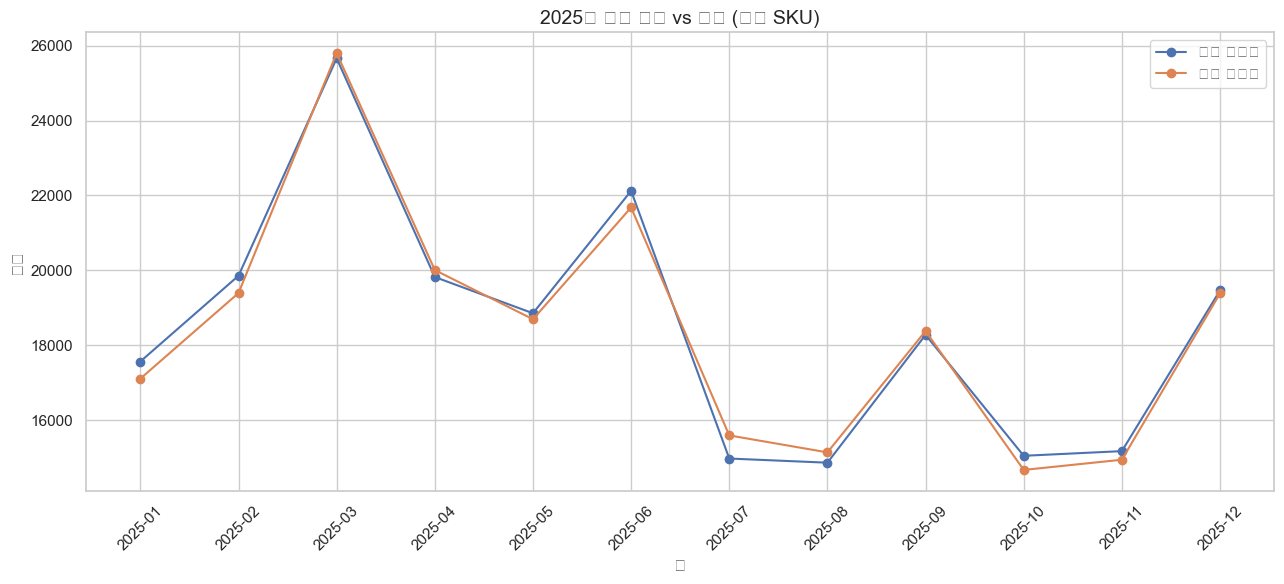

MAE 큰 SKU TOP10


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23388\1206358718.py:80: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: mean_absolute_error(g["actual"], g["pred"]))


,product_code,mae
3242,PHN-APP-128GB-레드-04982,6.589946
3277,PHN-APP-64GB-블랙-05072,4.884229
3419,PHN-SAM-128GB-블루-04989,4.571634
3424,PHN-SAM-256GB-블랙-05050,4.461292
3266,PHN-APP-512GB-블랙-04999,3.949819
3417,PHN-SAM-128GB-블랙-05062,3.760825
3256,PHN-APP-256GB-블루-04956,3.746784
3276,PHN-APP-64GB-블랙-05061,3.689974
3264,PHN-APP-512GB-레드-04973,3.674951
3253,PHN-APP-256GB-블랙-04979,3.670323


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23388\1206358718.py:100: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(safe_mape)


TypeError: DataFrame.reset_index() got an unexpected keyword argument 'name'. Did you mean 'names'?

In [13]:
# ============================================
# 0) 환경 준비
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style="whitegrid")

BASE = Path("C:/Users/chosw/ORDER101_114_AI/be18-fin-SYNERGY-ORDER101/python-server/app/data_pipeline")

# --------------------------------------------
# 파일 로드
# --------------------------------------------
eval_file = BASE / "eval_2025_pred_vs_actual.csv"
pred_file = BASE / "predictions.csv"
sku_file  = BASE / "sku_catalog_ml.csv"

df_eval = pd.read_csv(eval_file, parse_dates=["target_date"])
pred = pd.read_csv(pred_file, parse_dates=["target_date"])
sku = pd.read_csv(sku_file)

# --------------------------------------------
# 데이터 준비
# --------------------------------------------
df = df_eval.rename(columns={"y": "actual", "y_pred": "pred"})

# SKU → 카테고리 매핑 (cat_low만 존재)
df = df.merge(
    sku[["product_code", "cat_low"]],
    on="product_code",
    how="left"
)

df["cat_low"] = df["cat_low"].fillna("UNKNOWN")

df["month"] = df["target_date"].dt.to_period("M").astype(str)


# ============================================
# 1) 전체 2025년 성능 계산
# ============================================
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

mae_2025 = mean_absolute_error(df["actual"], df["pred"])
mape_2025 = mean_absolute_percentage_error(df["actual"], df["pred"]) * 100

print(f"전체 2025년 MAE={mae_2025:.4f}, MAPE={mape_2025:.2f}%")


# ============================================
# 2) 월별 실제 vs 예측
# ============================================
monthly = (
    df.groupby("month")[["actual", "pred"]]
      .sum()
      .reset_index()
)

plt.figure(figsize=(13,6))
plt.plot(monthly["month"], monthly["actual"], marker='o', label="실제 판매량")
plt.plot(monthly["month"], monthly["pred"], marker='o', label="예측 판매량")

plt.title("2025년 월별 실제 vs 예측 (전체 SKU)", fontsize=14)
plt.xlabel("월")
plt.ylabel("수량")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# ============================================
# 3) SKU별 Top 10 MAE
# ============================================
sku_mae = (
    df.groupby("product_code")
      .apply(lambda g: mean_absolute_error(g["actual"], g["pred"]))
      .reset_index(name="mae")
      .sort_values("mae", ascending=False)
)

sku_top10 = sku_mae.head(10)
print("MAE 큰 SKU TOP10")
display(sku_top10)


# ============================================
# 4) 카테고리(cat_low)별 성능
# ============================================
def safe_mape(x):
    if (x["actual"] == 0).any():
        return None
    return (np.abs(x["actual"] - x["pred"]) / x["actual"]).mean() * 100

cat_low_mape = (
    df.groupby("cat_low")
      .apply(safe_mape)
      .reset_index(name="MAPE")
      .sort_values("MAPE")
)

print("카테고리별 MAPE")
display(cat_low_mape)


# ============================================
# 5) SKU별 실제 vs 예측 (예: top 3 시각화)
# ============================================
top3 = sku_top10["product_code"].head(3).tolist()

for code in top3:
    temp = df[df["product_code"] == code]

    plt.figure(figsize=(12,4))
    plt.plot(temp["target_date"], temp["actual"], label="실제")
    plt.plot(temp["target_date"], temp["pred"], label="예측")
    plt.title(f"SKU: {code} 실제 vs 예측")
    plt.legend()
    plt.show()
